In [47]:
import time
import warnings

from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit

In [48]:
# distance calculator

def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


In [49]:
n_samples=1000


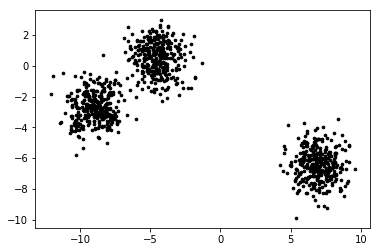

In [50]:
# in order to visualize we used the "blobs dataset" as an example

blobs = datasets.make_blobs(n_samples=n_samples, random_state=15)

points_blobs=blobs[0]

f1=points_blobs[0:((n_samples)), 0]
f2=points_blobs[0:((n_samples)), 1]

plt.scatter(f1, f2, c='black', s=7)

X = np.array(list(zip(f1, f2)))

# Basic kmeans -> Lloyd-Algorithmus

## Pseudo code
1. Initialization: Choose initial centroids -> choose k samples from the dataset X

    
    Looping between the following steps:


2. Assignment: Each sample is assigned to its nearest center

3. Update the centroids: calculate the mean values of all of the samples assigned to each previous centroid.

   the algorithm repeats these last two steps until there is no difference between the old and the new centroids 


## 1. Initialization

1. chossing number of clusers

In [51]:
k=4


2. In order to avoid that no datapoints will be assigned to the initial centroids, we choose some random samples from our dataset

In [52]:
Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid
    
      
C=X[Indecies_centroid]

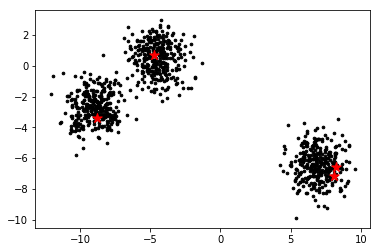

In [53]:
plt.scatter(f1,f2,c='black',s=7)
plt.scatter(C[:, 0], C[:, 1],marker='*',c='red',s=100)

## 2. Assignment

1. Distanzen von jedem Sample zu allen Clustern berechnen

In [54]:
for i in range(len(X)):
            distances = dist(C,[X[i]])

2. Minimale Distanz auswählen -> Zuordnung zu diesem Cluster

In [55]:
clusters = np.zeros(len(X)) ## Hier genieren wir einen leeren Array, der dann überschrieben wird in for loop


for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster

## 3. Update

calculate the mean values of all of the samples assigned to each previous centroid



In [56]:
for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
print(C)

[[ 7.01610301 -5.76498048]
 [-8.97504659 -2.69815055]
 [ 6.79956246 -7.36753108]
 [-4.53285473  0.50806983]]


die letzten zwei Schritte (Assignment und update) so lange wiederholen, bis sich Centroide nicht mehr verändern. daher keine Distanz von C_old zu C (new) 

-> Schlaufe um diese Schritte legen

In [65]:
clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
update_centroids = dist(C, C_old) # Konvergenz

while update_centroids.all() != 0:
    for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C) # der alte Wert muss zwischengespeichert werden, damit Veränderung von C_od zu C (new) berrechnet werden kann
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    update_centroids = dist(C, C_old)



## kompletter kmeans Algorithm + plots

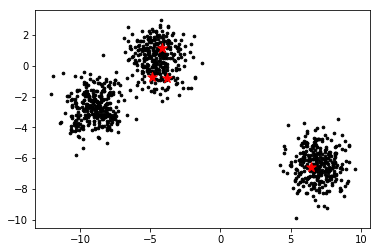

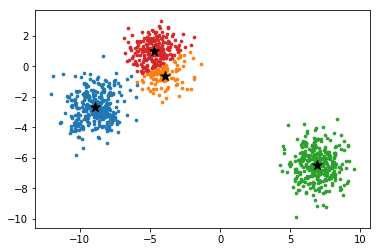

In [68]:
k=4
  
Indecies_centroid = np.random.choice(n_samples,size=k) 
    
C=X[Indecies_centroid]

plt.scatter(f1,f2,c='black',s=7)
plt.scatter(C[:, 0], C[:, 1],marker='*',c='red',s=100)
    
clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
update_centroids = dist(C, C_old) # Konvergenz

while update_centroids.all() != 0:
    for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    update_centroids = dist(C, C_old)
        
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=100)


## scikit learn implementation + plots

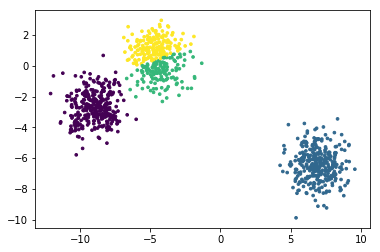

In [67]:
kmeans = KMeans(n_clusters=4).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans,s=7)